## Exploratory Data Analysis Classification of Students Test Scores Using Decision Tree Prediction
Author : Ade Kukuh Setiawan

Description : This notebook provides a preliminary Step before applying machine learning algorithm for Students test score prediction
data sourch:  https://www.kaggle.com/adithyabshetty100/student-performance# . 
We Running on 2 device Jupyter and Pycharm for try and search another code 

Outline : 
1. Data Extraction
2. Data Exploration
3. Data Preprocessing

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz

# 1. Data Extraction

In [3]:
dataset = pd.read_csv("../data/StudentsPerformance.csv")

In [4]:
dataset.head

<bound method NDFrame.head of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none      

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
print(dataset.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [7]:
dataset.shape

(1000, 8)

In [8]:
m = dataset.shape[0] #number of rows
n = dataset.shape[1] #number of coloumn

print("Number of rows : " +str(m))
print("Number of coloumn : " +str(n))

Number of rows : 1000
Number of coloumn : 8


In [9]:
print(dataset.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [10]:
attribute_names = list(dataset.columns.values)

print(dataset.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


# 2. Data Exploration

In [11]:
data_train, data_test_hold = train_test_split(dataset, test_size=0.30, random_state=21)
data_test, data_hold = train_test_split(data_test_hold, test_size=0.33, random_state=21)

In [12]:
one_hot = pd.get_dummies(dataset['gender'], prefix='gender', drop_first=True)
dataset = dataset.join(one_hot)
one_hot = pd.get_dummies(dataset['race/ethnicity'], prefix='race/ethnicity', drop_first=True)
dataset = dataset.join(one_hot)
one_hot = pd.get_dummies(dataset['parental level of education'], prefix='parental level of education', drop_first=True)
dataset = dataset.join(one_hot)
one_hot = pd.get_dummies(dataset['lunch'], prefix='lunch', drop_first=True)
dataset = dataset.join(one_hot)
one_hot = pd.get_dummies(dataset['test preparation course'], prefix='test preparation course', drop_first=True)
dataset = dataset.join(one_hot)
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,female,group C,some college,standard,completed,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1


In [13]:
model = DecisionTreeClassifier(criterion='gini', splitter='best',
                               max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                               max_features=None, random_state=None,
                               max_leaf_nodes=None, min_impurity_decrease=0.0,
                               min_impurity_split=None, class_weight=None,
                               presort=False)model.fit(X_train[:,5:], y_train)

In [14]:
passingmarks = 55

P    779
F    221
Name: Math_PassStatus, dtype: int64
P    840
F    160
Name: Reading_PassStatus, dtype: int64
P    797
F    203
Name: Writing_PassStatus, dtype: int64
P    706
F    294
Name: OverAll_PassStatus, dtype: int64


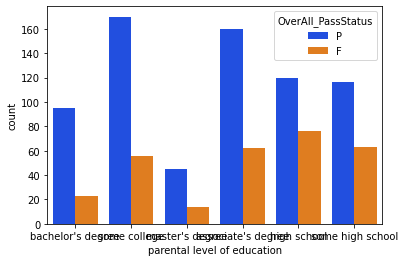

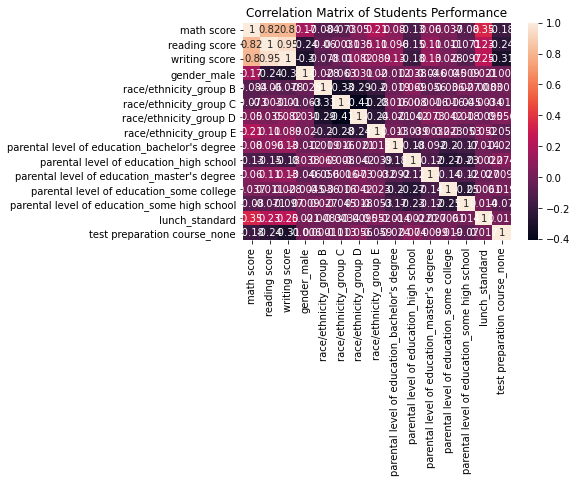

In [15]:
dataset['Math_PassStatus'] = np.where(dataset['math score']<passingmarks, 'F', 'P')
print(dataset.Math_PassStatus.value_counts())

dataset['Reading_PassStatus'] = np.where(dataset['reading score']<passingmarks, 'F', 'P')
print(dataset.Reading_PassStatus.value_counts())

dataset['Writing_PassStatus'] = np.where(dataset['writing score']<passingmarks, 'F', 'P')
print(dataset.Writing_PassStatus.value_counts())

dataset['OverAll_PassStatus'] = dataset.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)
print(dataset.OverAll_PassStatus.value_counts())
sns.countplot(x='parental level of education', data = dataset, hue='OverAll_PassStatus', palette='bright')
plt.show()
sns.heatmap(data=dataset.corr(),annot=True)
plt.title("Correlation Matrix of Students Performance")
plt.show()

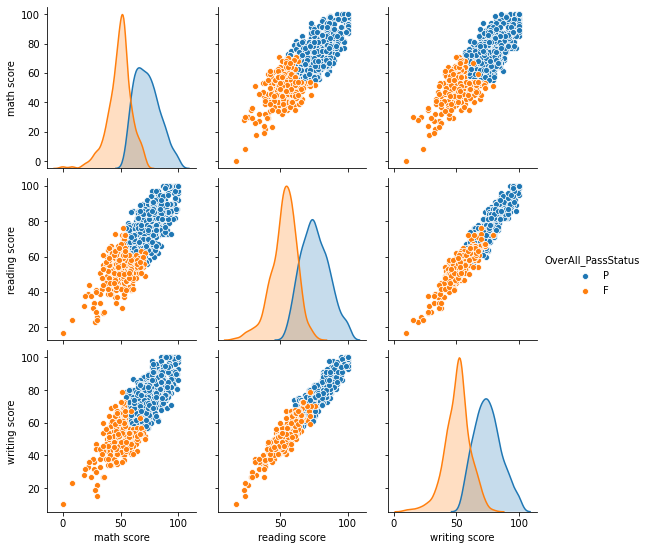

In [17]:
sns.pairplot(data=dataset[['math score', 'reading score', 'writing score', 'OverAll_PassStatus']],
                 hue='OverAll_PassStatus')
plt.show()

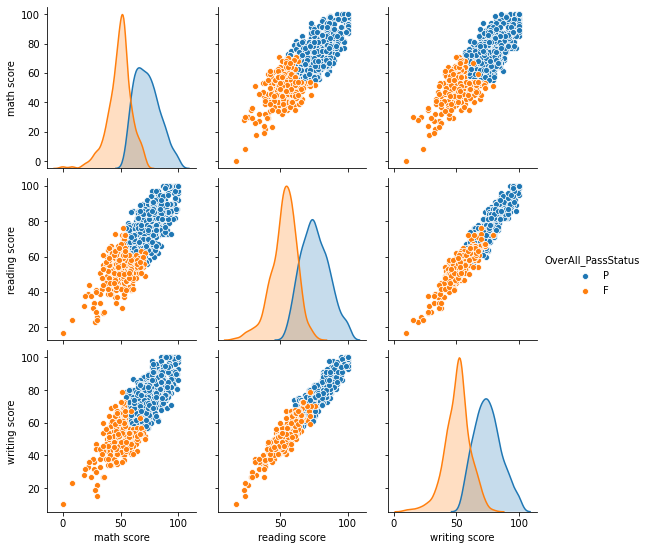

In [20]:
sns.pairplot(data=dataset[['math score', 'reading score', 'writing score', 'OverAll_PassStatus']],
                 hue='OverAll_PassStatus')
plt.show()

In [21]:
dataset.corr()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
math score,1.000000,0.817580,0.802642,0.167982,-0.084250,-0.073387,0.050071,0.205855,0.079664,-0.128725,0.060417,0.037056,-0.079852,0.350877,-0.177702
reading score,0.817580,1.000000,0.954598,-0.244313,-0.060283,-0.003074,0.035177,0.106712,0.096024,-0.151068,0.106452,0.010782,-0.071369,0.229560,-0.241780
writing score,0.802642,0.954598,1.000000,-0.301225,-0.078254,-0.010203,0.082032,0.089077,0.128297,-0.182211,0.125693,0.027989,-0.097326,0.245769,-0.312946
gender_male,0.167982,-0.244313,-0.301225,1.000000,-0.028466,-0.063368,0.030566,0.020302,-0.011638,0.037952,-0.046188,-0.004460,0.008990,0.021372,-0.006028
race/ethnicity_group B,-0.084250,-0.060283,-0.078254,-0.028466,1.000000,-0.331479,-0.288574,-0.195411,-0.019121,0.069093,-0.056363,-0.036203,0.026531,-0.008257,0.000106
race/ethnicity_group C,-0.073387,-0.003074,-0.010203,-0.063368,-0.331479,1.000000,-0.407797,-0.276145,0.015682,0.007977,0.001630,-0.015872,-0.045339,-0.003385,-0.012522
race/ethnicity_group D,0.050071,0.035177,0.082032,0.030566,-0.288574,-0.407797,1.000000,-0.240402,-0.020556,-0.042118,0.072793,0.042347,0.018402,-0.009458,0.055956
race/ethnicity_group E,0.205855,0.106712,0.089077,0.020302,-0.195411,-0.276145,-0.240402,1.000000,0.013221,-0.039494,-0.003180,0.023153,-0.053075,0.052398,-0.059393
parental level of education_bachelor's degree,0.079664,0.096024,0.128297,-0.011638,-0.019121,0.015682,-0.020556,0.013221,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,-0.013668,-0.024285
parental level of education_high school,-0.128725,-0.151068,-0.182211,0.037952,0.069093,0.007977,-0.042118,-0.039494,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,-0.002211,0.074446


In [33]:
data_train, data_test_hold = train_test_split(dataset, test_size=0.30, random_state=21)
data_test, data_hold = train_test_split(data_test_hold, test_size=0.33, random_state=21)

In [34]:
columns_move = ["gender", "race/ethnicity", "parental level of education", "lunch",
                "test preparation course", "gender_male", "race/ethnicity_group B",
                "race/ethnicity_group C", "race/ethnicity_group D", "race/ethnicity_group E",
                "parental level of education_bachelor's degree", "parental level of education_high school",
                "parental level of education_master's degree", "parental level of education_some college",
                "parental level of education_some high school", "lunch_standard", "test preparation course_none"]

In [35]:
y_train = data_train["OverAll_PassStatus"].values
X_train = data_train[columns_move].values
y_test = data_test["OverAll_PassStatus"].values
X_test = data_test[columns_move].values

In [37]:
y_pred = model.predict(X_test[:,5:])
print("Prediksi akurasi testing set: %.2f" % (accuracy_score(y_test,y_pred)*100), "%")
y_pred_train = model.predict(X_train[:,5:])
print("Prediksi akurasi training set: %.2f" % (accuracy_score(y_train,y_pred_train)*100), "%")

Prediksi akurasi testing set: 60.20 %
Prediksi akurasi training set: 81.43 %


In [38]:
a = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['prediction/f', 'prediction/p'], index=['actual/f', 'actual/p'])
print("Confusion Matrix:")
print(a)

Confusion Matrix:
          prediction/f  prediction/p
actual/f            22            42
actual/p            38            99


In [39]:
print("Classification Report:")
print("")
print(classification_report(y_test,y_pred))

Classification Report:

              precision    recall  f1-score   support

           F       0.37      0.34      0.35        64
           P       0.70      0.72      0.71       137

    accuracy                           0.60       201
   macro avg       0.53      0.53      0.53       201
weighted avg       0.60      0.60      0.60       201

